# Analyse des Composantes Principales pour la gestion de portefeuilles d'actions

## Importation des packages

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import data
import seaborn as sns
import sklearn as sk
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', None)
np.random.seed(167)

## Vérification des versions

In [3]:
print('Python            version {}'.format(sys.version))
print('Numpy             version {}'.format(np.__version__))
print('Pandas            version {}'.format(pd.__version__))
print('Seabron           version {}'.format(sns.__version__))
print('Sklearn           version {}'.format(sk.__version__))
print('Pandas DataReader version {}'.format(pdr.__version__))

Python            version 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
Numpy             version 1.20.3
Pandas            version 1.3.2
Seabron           version 0.11.2
Sklearn           version 1.0.1
Pandas DataReader version 0.10.0


## Récupération des données 

On se focalise sur les 100 entreprises avec la plus grande capitalisation boursière

In [4]:
# Chargement du fichier comportement les capitalisations boursières
market_cap = pd.read_csv("data/market_cap.csv", index_col=0)
market_cap

,marketCap
A,48856465408
AA,9126754304
AAC,1227499904
AACG,67463472
AACI,202746000
...,...
ZWRK,280600000
ZY,970184512
ZYME,873998144
ZYNE,169543664


In [5]:
top100_market_cap = market_cap.marketCap.nlargest(50)
top100_market_cap

MSFT     2543110062080
AAPL     2454233284608
GOOGL    2002242109440
GOOG     1958893977600
AMZN     1786169393152
TSLA     1011429081088
FB        971627167744
GE        903014842368
TSM       610479374336
JPM       501469380608
V         468898611200
BABA      456106868736
UNH       430115127296
JNJ       430113226752
HD        412279078912
BAC       401494081536
WMT       401225809920
PG        362362503168
MA        360141520896
ASML      354620014592
ADBE      316354658304
NFLX      301066190848
DIS       289691336704
CRM       281991184384
XOM       275311329280
PFE       274299682816
NKE       273935220736
ORCL      267222319104
NVO       264960622592
TM        259419389952
TMO       255110561792
PYPL      250276233216
LLY       247217471488
CMCSA     245874458624
KO        244299792384
CSCO      242000429056
ACN       234642014208
ABT       232016265216
COST      231611236352
AVGO      231405649920
PEP       226518220800
CVX       226026487808
DHR       218976649216
VZ        2

In [6]:
# On considère les données à partir de XXX jusqu'à YYY
start_date = '2011-01-01'
end_date = '2021-11-16'

# On charge les cours d'actions à partir de Yahoo Finance grace au module Pandas_DataReader
stocks = data.DataReader(top100_market_cap.index, 'yahoo', start_date)[["Adj Close"]].pct_change()
stocks.columns = [k[1] for k in stocks.columns.values]
stocks

,MSFT,AAPL,GOOGL,GOOG,AMZN,TSLA,FB,GE,TSM,JPM,V,BABA,UNH,JNJ,HD,BAC,WMT,PG,MA,ASML,ADBE,NFLX,DIS,CRM,XOM,PFE,NKE,ORCL,NVO,TM,TMO,PYPL,LLY,CMCSA,KO,CSCO,ACN,ABT,COST,AVGO,PEP,CVX,DHR,VZ,MRK,WFC,SHOP,ABBV,INTC,QCOM
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-04,0.003931,0.005219,-0.003690,-0.003690,0.004288,0.001878,NaN,0.018052,0.003177,0.014473,0.001135,NaN,0.009156,0.008437,-0.018125,0.003524,0.003849,0.002779,0.012905,-0.032850,0.007031,0.016591,0.030936,-0.006662,0.004695,0.017534,-0.024625,-0.004428,0.032287,0.005414,0.004605,NaN,0.000857,0.003130,-0.020699,0.001464,-0.006586,0.009410,-0.001932,0.007194,-0.005171,-0.003698,-0.005722,0.020038,0.008602,0.002217,NaN,NaN,0.014389,0.015743
2011-01-05,-0.003204,0.008180,0.011543,0.011543,0.013026,0.005999,NaN,0.001612,-0.021378,0.012228,0.021105,NaN,0.003202,-0.000632,-0.003173,0.018258,-0.006573,-0.002310,0.029459,-0.020326,0.022533,-0.009042,0.024878,0.047977,-0.002670,0.006671,0.006550,-0.013977,0.006534,0.004257,-0.003526,NaN,-0.007137,0.013369,-0.005949,0.012183,0.000207,0.000000,-0.018527,-0.000357,0.018040,-0.001747,-0.001065,0.013724,0.005777,0.022749,NaN,NaN,-0.009929,0.020796
2011-01-06,0.029286,-0.000809,0.007273,0.007273,-0.008324,0.039135,NaN,-0.004292,0.041262,-0.004921,0.014981,NaN,0.020751,-0.001579,-0.004051,-0.004138,-0.008270,-0.001697,0.004258,-0.008463,0.001552,-0.009681,-0.007758,0.008017,0.006426,0.003865,-0.008992,0.004188,-0.002597,0.016708,0.001061,NaN,0.004600,0.000879,-0.007245,0.008666,0.003728,-0.002071,-0.004789,0.018935,0.003754,-0.008202,0.000640,-0.025604,0.013676,-0.006796,NaN,NaN,-0.008118,0.012301
2011-01-07,-0.007633,0.007162,0.004792,0.004792,-0.001991,0.012912,NaN,-0.007004,0.015540,-0.018885,-0.002870,NaN,0.002085,-0.009650,-0.001162,-0.013158,0.002223,-0.002937,-0.000130,-0.000275,-0.007127,0.007360,-0.005044,-0.007814,0.005453,0.008801,-0.002746,-0.004491,-0.009372,0.011283,-0.003712,NaN,-0.001145,-0.002636,-0.001745,0.000955,0.001651,0.004151,0.000000,-0.008415,-0.006732,0.005513,-0.000639,-0.008280,0.007825,-0.020218,NaN,NaN,-0.005296,-0.017847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-12,0.012905,0.014337,0.019974,0.019745,0.015162,-0.028293,0.040123,0.005514,0.004230,-0.004475,0.007936,-0.006196,0.003498,0.011959,0.013601,-0.012213,-0.004983,0.001093,0.025851,0.021886,0.022436,0.038064,-0.015298,0.012113,-0.007619,-0.008968,0.012697,-0.005317,-0.002733,0.029995,0.005970,0.031035,-0.008137,-0.002982,-0.002291,0.001057,0.013708,0.009430,0.009743,0.014080,-0.000246,0.000613,-0.000525,-0.002097,-0.000238,0.007314,0.120228,0.002915,-0.004354,0.003163
2021-11-15,-0.001930,0.000067,-0.001520,-0.001721,0.005824,-0.019382,0.019566,-0.008551,-0.004802,-0.001798,0.000990,-0.001619,-0.017844,-0.009030,-0.004160,0.002984,-0.005753,0.005731,-0.005887,0.005977,0.003239,-0.004805,-0.007517,-0.003783,0.008618,-0.001609,-0.001419,0.005131,0.003448,-0.000054,-0.004549,0.020355,-0.004699,-0.002243,0.000177,0.007920,-0.007489,0.007707,0.005259,0.004528,0.007070,0.022674,-0.015441,0.001146,-0.003690,0.002355,-0.007799,-0.001111,0.000199,0.021644
2021-11-16,0.010236,0.006667,-0.003880,-0.002089,-0.001405,0.040794,-0.013235,-0.031124,-0.000339,-0.007205,0.013566,0.011349,-0.002618,-0.005198,0.057265,0.000638,-0.025458,-0.001425,0.022692,0.004471,0.017128,0.011879,0.002525,0.005238,0.010098,-0.001007,0.017649,0.016911,0.004406,0.016487,0.014422,0.014727,-0.002747,-0.004871,-0.007065,-0.004715,0.007355,0.011202,0.013137,0.005303,-0.002991,0.003938,0.019721,-0.006489,0.005018,-0.013900,0.011361,-0.003595,0.005763,0.078927


## Préparation des données

In [7]:
stocks = stocks.dropna(thresh=int(stocks.shape[0] * .95), axis=1)
stocks = stocks.dropna(thresh=int(stocks.shape[1] * .95))
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2739 entries, 2011-01-04 to 2021-11-18
Data columns (total 45 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MSFT    2739 non-null   float64
 1   AAPL    2739 non-null   float64
 2   GOOGL   2739 non-null   float64
 3   GOOG    2739 non-null   float64
 4   AMZN    2739 non-null   float64
 5   TSLA    2739 non-null   float64
 6   GE      2739 non-null   float64
 7   TSM     2739 non-null   float64
 8   JPM     2739 non-null   float64
 9   V       2739 non-null   float64
 10  UNH     2739 non-null   float64
 11  JNJ     2739 non-null   float64
 12  HD      2739 non-null   float64
 13  BAC     2739 non-null   float64
 14  WMT     2739 non-null   float64
 15  PG      2739 non-null   float64
 16  MA      2739 non-null   float64
 17  ASML    2739 non-null   float64
 18  ADBE    2739 non-null   float64
 19  NFLX    2739 non-null   float64
 20  DIS     2739 non-null   float64
 21  CRM     2739 non-nu

## Analyse des covariances

In [8]:
cov = stocks.cov()

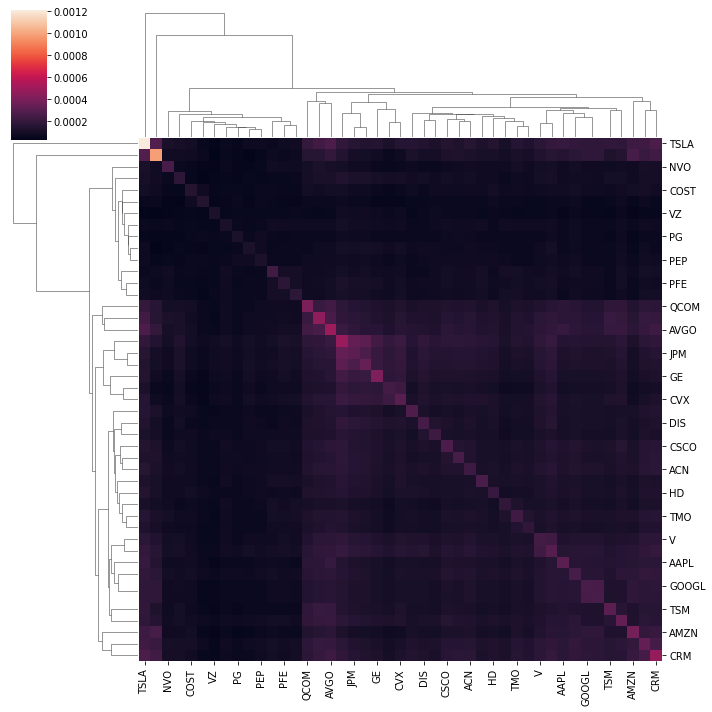

In [9]:
sns.clustermap(cov);

## PCA

In [10]:
pca = PCA()
pca.fit(cov)
pd.Series(pca.explained_variance_ratio_).to_frame('Explained Variance').head().style.format('{:,.2%}'.format)

,Explained Variance
0,46.38%
1,18.03%
2,12.10%
3,6.36%
4,2.74%


In [11]:
top4 = pd.DataFrame(pca.components_[:4], columns=cov.columns)
eigen_portfolios = top4.div(top4.sum(1), axis=0)
eigen_portfolios.index = [f'Portfolio {i}' for i in range(1, 5)]

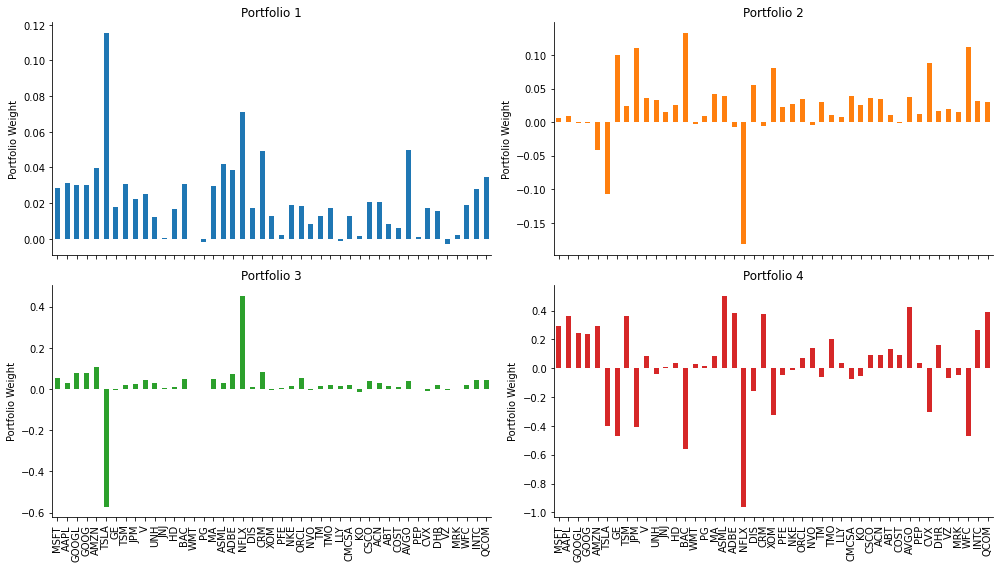

In [12]:
axes = eigen_portfolios.T.plot.bar(subplots=True,
                                   layout=(2, 2),
                                   figsize=(14, 8),
                                   legend=False)
for ax in axes.flatten():
    ax.set_ylabel('Portfolio Weight')
    ax.set_xlabel('')
sns.despine()
plt.tight_layout()

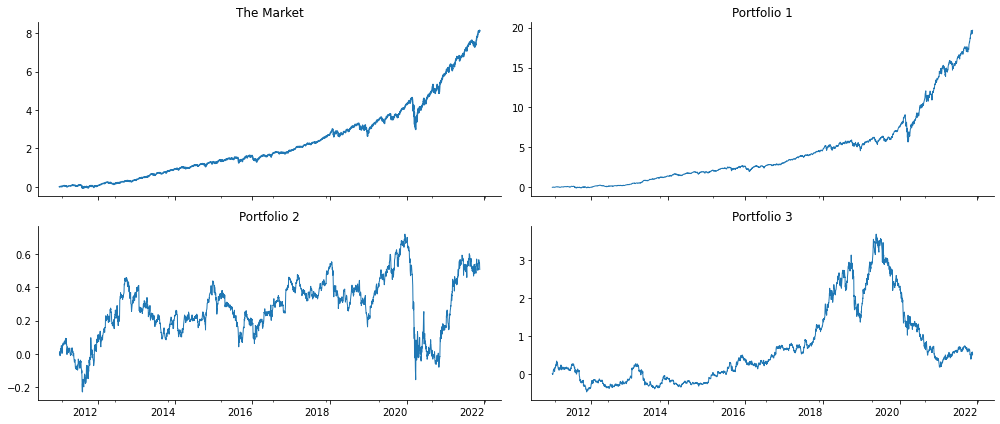

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 6), sharex=True)
axes = axes.flatten()
stocks.mean(1).add(1).cumprod().sub(1).plot(title='The Market', ax=axes[0])
for i in range(3):
    rc = stocks.mul(eigen_portfolios.iloc[i]).sum(1).add(1).cumprod().sub(1)
    rc.plot(title=f'Portfolio {i+1}', ax=axes[i+1], lw=1, rot=0)

for i in range(4):
    axes[i].set_xlabel('')
sns.despine()
fig.tight_layout()